# Multivariate FTS applied to SONDA/Florianopolis dataset

Install/update pyFTS directly from the source repository:

In [1]:
!pip install -U git+https://github.com/petroniocandido/pyFTS

  Cloning https://github.com/petroniocandido/pyFTS to /private/var/folders/13/t7d8w0nd0hv6w9_p2rntvym00000gr/T/pip-mc8p87hx-build
  Found existing installation: pyFTS 1.1.1
    Uninstalling pyFTS-1.1.1:
      Successfully uninstalled pyFTS-1.1.1
  Running setup.py install for pyFTS ... done


Import SONDA dataset

In [4]:
import pandas as pd
import matplotlib.pylab as plt
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/cseveriano/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
os.chdir("/Users/cseveriano/spatio-temporal-forecasting/")

fln_df = pd.read_csv('data/processed/SONDA/FLN-15min.csv', sep=";", parse_dates=['date'])

joi_df = pd.read_csv('data/processed/SONDA/JOI-15min.csv', sep=";", parse_dates=['date'])

sbr_df = pd.read_csv('data/processed/SONDA/SBR-15min.csv', sep=";", parse_dates=['date'])

In [6]:
fln_train = fln_df[(fln_df.date >= '2013-11-01') & (fln_df.date <= '2014-10-31')]
fln_test = fln_df[(fln_df.date >= '2014-11-01') & (fln_df.date <= '2015-10-31')]

del fln_df

In [7]:
train = fln_train
test = fln_test

In [9]:
train

,date,glo_avg,dir_avg,diff_avg,lw_avg,tp_sfc,humid,press,rain,ws_10m,wd_10m
0,2013-11-01 00:00:00,-0.634143,-0.212643,-1.005929,399.600000,21.420714,63.644286,1016.179286,0.000000,NaN,NaN
1,2013-11-01 00:15:00,-0.652333,-0.262600,-1.066133,399.020000,21.431333,63.303333,1016.384000,0.000000,NaN,NaN
2,2013-11-01 00:30:00,-0.709533,-0.269000,-1.155000,398.840000,21.481333,62.969333,1016.464000,0.000000,NaN,NaN
3,2013-11-01 00:45:00,-0.716267,-0.063067,-1.157000,398.833333,21.420000,63.486000,1016.290000,0.000000,NaN,NaN
4,2013-11-01 01:00:00,-0.714733,-0.040333,-1.157000,398.633333,21.448000,63.742667,1016.376000,0.000000,NaN,NaN
5,2013-11-01 01:15:00,-0.687200,-0.028133,-1.157533,398.000000,21.356667,64.509333,1016.402000,0.000000,NaN,NaN
6,2013-11-01 01:30:00,-0.721200,-0.016267,-1.157733,396.620000,21.350667,65.155333,1016.258000,0.000000,NaN,NaN
7,2013-11-01 01:45:00,-0.715667,-0.038333,-1.152067,396.633333,21.338000,64.636667,1016.144000,0.000000,NaN,NaN
8,2013-11-01 02:00:00,-0.691867,-0.195800,-1.137267,396.700000,21.282667,64.601333,1016.040000,0.000000,NaN,NaN
9,2013-11-01 02:15:00,-0.677000,-0.271800,-1.142000,396.420000,21.252667,65.403333,1015.808000,0.000000,NaN,NaN


## Seasonal Variables


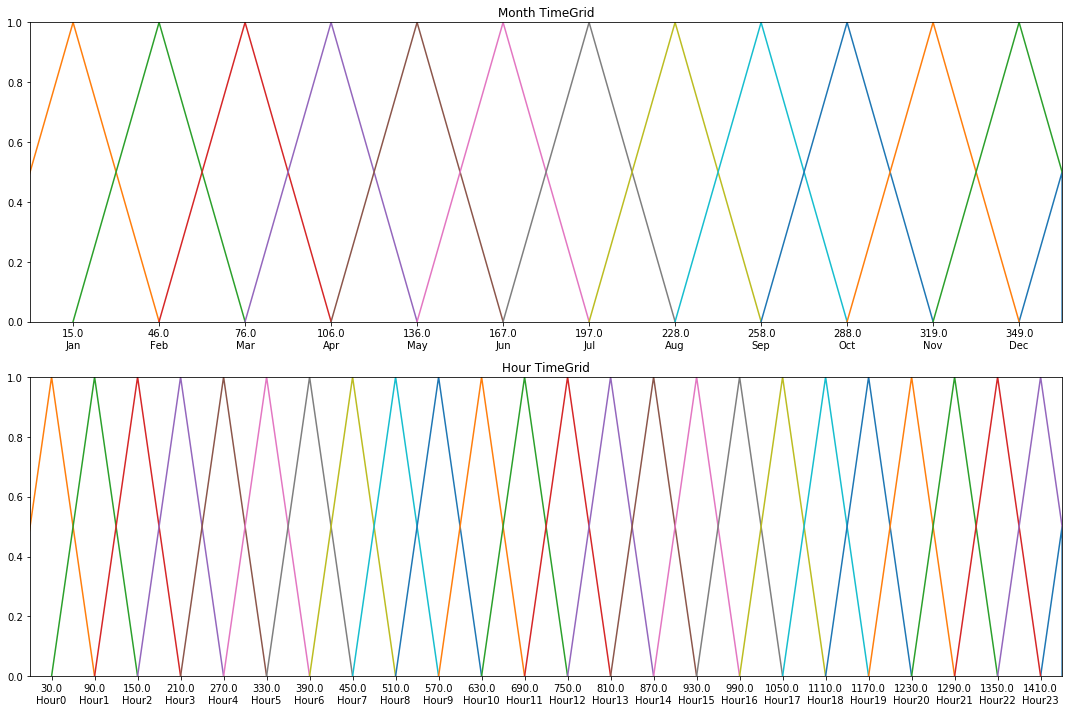

In [10]:
from pyFTS.models.multivariate import common, variable, mvfts
from pyFTS.models.seasonal import partitioner as seasonal
from pyFTS.models.seasonal.common import DateTime

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=[15,10])

sp = {'seasonality': DateTime.day_of_year , 'names': ['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep','Oct','Nov','Dec']}

vmonth = variable.Variable("Month", data_label="date", partitioner=seasonal.TimeGridPartitioner, npart=12, 
                           data=train, partitioner_specific=sp)
vmonth.partitioner.plot(axes[0])

sp = {'seasonality': DateTime.minute_of_day}

vhour = variable.Variable("Hour", data_label="date", partitioner=seasonal.TimeGridPartitioner, npart=24, 
                          data=train, partitioner_specific=sp)

vhour.partitioner.plot(axes[1])

plt.tight_layout()






## Irradiance Variable, without transformation

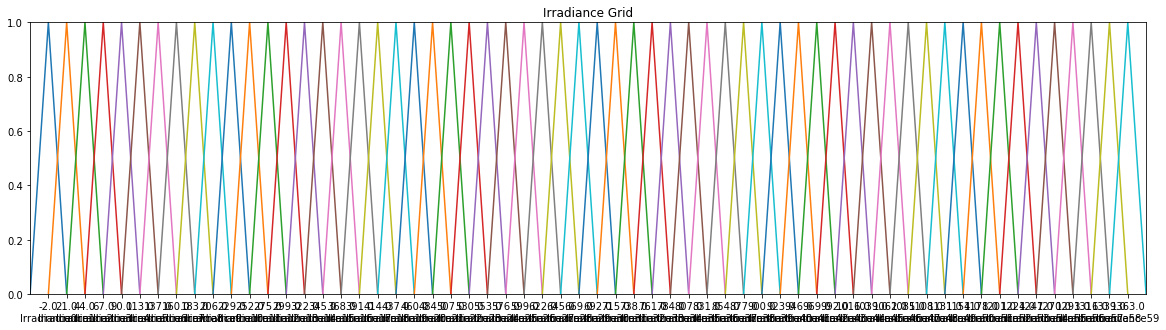

In [11]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.models.multivariate import common, variable, mvfts

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=[20,5])

vavg = variable.Variable("Irradiance", data_label="glo_avg", partitioner=Grid.GridPartitioner, npart=60, 
                         data=train) 
vavg.partitioner.plot(axes)



## Radiance Variable, with Differentiation

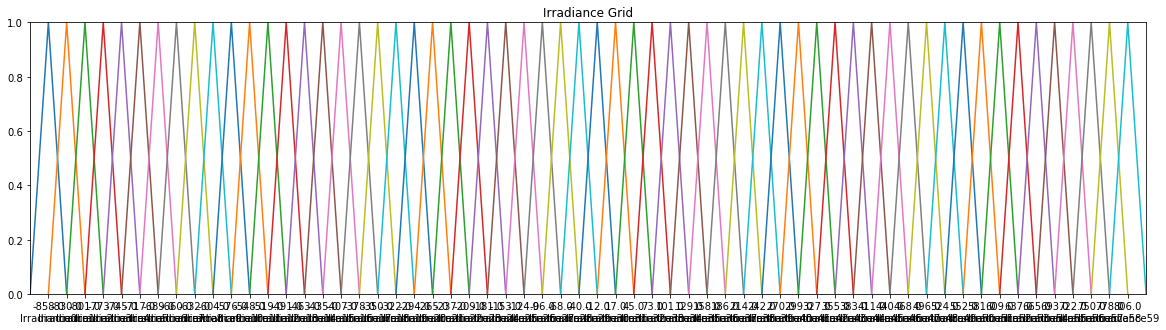

In [12]:
from pyFTS.partitioners import Grid, Util as pUtil
from pyFTS.models.multivariate import common, variable, mvfts
from pyFTS.common import Transformations

bc = Transformations.BoxCox(0)
diff = Transformations.Differential(1)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=[20,5])

vavg_diff = variable.Variable("Irradiance", data_label="glo_avg", partitioner=Grid.GridPartitioner, npart=60, 
                         data=train, transformation=diff) 
vavg_diff.partitioner.plot(axes)



## MFTS model without transformations

In [13]:
from pyFTS.models.multivariate import common, variable, mvfts

model1 = mvfts.MVFTS("")

model1.append_variable(vmonth)

model1.append_variable(vhour)

model1.append_variable(vavg)

model1.target_variable = vavg

model1.fit(train, num_batches=200, save=True, batch_save=True, file_path='mvfts_sonda_gloavg', batch_save_interval=10)


[ 18:00:06] Start training
[ 18:00:06] Starting batch 1
[ 18:00:07] Finish batch 1
[ 18:00:07] Starting batch 2
[ 18:00:07] Finish batch 2
[ 18:00:07] Starting batch 3
[ 18:00:08] Finish batch 3
[ 18:00:08] Starting batch 4
[ 18:00:08] Finish batch 4
[ 18:00:08] Starting batch 5
[ 18:00:08] Finish batch 5
[ 18:00:08] Starting batch 6
[ 18:00:09] Finish batch 6
[ 18:00:09] Starting batch 7
[ 18:00:09] Finish batch 7
[ 18:00:09] Starting batch 8
[ 18:00:10] Finish batch 8
[ 18:00:10] Starting batch 9
[ 18:00:10] Finish batch 9
[ 18:00:10] Starting batch 10
[ 18:00:11] Finish batch 10
[ 18:00:11] Starting batch 11
[ 18:00:11] Finish batch 11
[ 18:00:11] Starting batch 12
[ 18:00:12] Finish batch 12
[ 18:00:12] Starting batch 13
[ 18:00:12] Finish batch 13
[ 18:00:12] Starting batch 14
[ 18:00:13] Finish batch 14
[ 18:00:13] Starting batch 15
[ 18:00:13] Finish batch 15
[ 18:00:13] Starting batch 16
[ 18:00:14] Finish batch 16
[ 18:00:14] Starting batch 17
[ 18:00:14] Finish batch 17
[ 18:

## MVFTS with differentiation

In [14]:
from pyFTS.models.multivariate import common, variable, mvfts

model2 = mvfts.MVFTS("")

model2.append_variable(vmonth)

model2.append_variable(vhour)

model2.append_variable(vavg_diff)

model2.target_variable = vavg_diff

model2.fit(train, num_batches=200, save=True, batch_save=True, file_path='mvfts_sonda_gloavg_diff', batch_save_interval=10)


[ 18:06:01] Start training
[ 18:06:01] Starting batch 1
[ 18:06:01] Finish batch 1
[ 18:06:01] Starting batch 2
[ 18:06:02] Finish batch 2
[ 18:06:02] Starting batch 3
[ 18:06:02] Finish batch 3
[ 18:06:02] Starting batch 4
[ 18:06:03] Finish batch 4
[ 18:06:03] Starting batch 5
[ 18:06:03] Finish batch 5
[ 18:06:03] Starting batch 6
[ 18:06:03] Finish batch 6
[ 18:06:03] Starting batch 7
[ 18:06:04] Finish batch 7
[ 18:06:04] Starting batch 8
[ 18:06:04] Finish batch 8
[ 18:06:04] Starting batch 9
[ 18:06:05] Finish batch 9
[ 18:06:05] Starting batch 10
[ 18:06:05] Finish batch 10
[ 18:06:05] Starting batch 11
[ 18:06:06] Finish batch 11
[ 18:06:06] Starting batch 12
[ 18:06:06] Finish batch 12
[ 18:06:06] Starting batch 13
[ 18:06:06] Finish batch 13
[ 18:06:06] Starting batch 14
[ 18:06:07] Finish batch 14
[ 18:06:07] Starting batch 15
[ 18:06:07] Finish batch 15
[ 18:06:07] Starting batch 16
[ 18:06:08] Finish batch 16
[ 18:06:08] Starting batch 17
[ 18:06:08] Finish batch 17
[ 18:

## Model Testing

Loading pre-trained models

In [15]:
from pyFTS.common import Util

model1 = Util.load_obj('mvfts_sonda_gloavg')
model1.name = "MVFTS Normal"
model2 = Util.load_obj('mvfts_sonda_gloavg_diff')
model2.name = "MVFTS diff"

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/pyFTS/models/multivariate/mvfts.py:120: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.sum(mv))


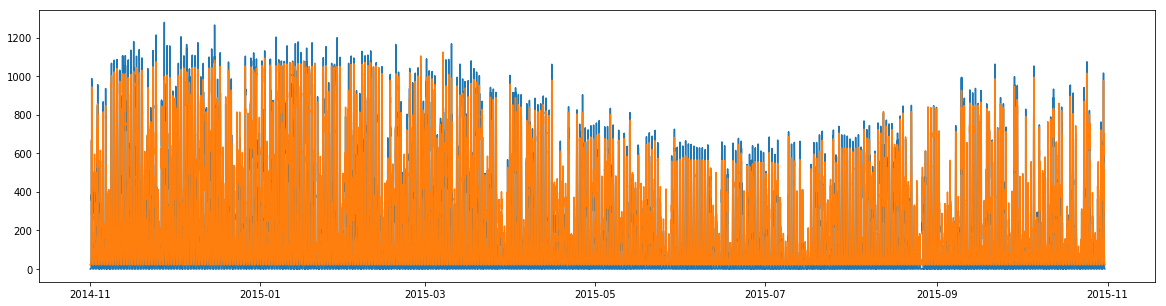

In [18]:
forecasted1 = model1.predict(test)
#forecasted2 = model2.predict(test)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[20,5])

ax.plot(test['date'].values, test['glo_avg'].values)

ax.plot(test['date'].values, forecasted1)
#ax.plot(test['date'].values, forecasted2)


In [20]:
from pyFTS.benchmarks import benchmarks as bchmk

bchmk.plot_compared_series(test, [model1], bchmk.colors, intervals=False)

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/pyFTS/models/multivariate/mvfts.py:120: RuntimeWarning: invalid value encountered in double_scalars
  ret.append(np.dot(mv,mp.T)/np.sum(mv))


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10a5cb0d0> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

In [26]:
from pyFTS.benchmarks import Measures

_rmse = Measures.rmse(test.glo_avg.tolist(), forecasted1)

#forecasted1

print("RMSE: ", _rmse, "\n")
#print("SMAPE: ",_smape, "\n")
#print("U: ",_u, "\n")

RMSE:  44.4052649118 



In [38]:
!pip install -U matplotlib

    100% |████████████████████████████████| 12.5MB 107kB/s 
    100% |████████████████████████████████| 194kB 4.1MB/s 
    100% |████████████████████████████████| 512kB 2.4MB/s 
Requirement already up-to-date: six>=1.10 in /usr/local/lib/python3.6/dist-packages (from matplotlib)
Requirement already up-to-date: cycler>=0.10 in /usr/local/lib/python3.6/dist-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /usr/local/lib/python3.6/dist-packages (from matplotlib)
    100% |████████████████████████████████| 952kB 1.4MB/s 
    100% |████████████████████████████████| 12.2MB 111kB/s 
    100% |████████████████████████████████| 491kB 1.9MB/s 
  Found existing installation: python-dateutil 2.5.3
    Uninstalling python-dateutil-2.5.3:
      Successfully uninstalled python-dateutil-2.5.3
  Found existing installation: pytz 2016.7
    Uninstalling pytz-2016.7:
      Successfully uninstalled pytz-2016.7
  Found existing installation: setuptools 